In [1]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
import logging
import os
import glob
import sys
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import scipy as sp
# Local imports
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope/GNURadio")))
from radiotelescope.observations.observations import Observations as Obs
from radiotelescope.instruments import RTLSDRGNU
# Inicializando loggers
logger = logging.getLogger("radiotelescope")
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

Para observações conecte o dongle na porta USB local.


In [2]:
sys.version

'3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) \n[GCC 10.3.0]'

## Usando Pacote Radiotelescope

In [2]:
RTLSDRGNU.instrument.name = "UIRAPURU"
RTLSDRGNU.instrument.name
RTLSDRGNU.instrument.Alt = 75
RTLSDRGNU.instrument.Az
RTLSDRGNU.instrument.lat
RTLSDRGNU.instrument.lon
RTLSDRGNU.instrument.elev

'UIRAPURU'

0

<Quantity -7.211637 deg>

<Quantity -35.908138 deg>

<Quantity 553. m>

# Frequência 1000Mhz - 01/03/2023

In [3]:
fuso = RTLSDRGNU.instrument.timezone
begin = fuso.localize(pd.to_datetime("2023-03-02 0:00:00"))
obs = Obs(t_start=begin, duration=pd.Timedelta(24, unit="h")).initialize()
obs.backend = RTLSDRGNU
# Edite este nome com o prefixo que você usou no gnuradio.
RTLSDRGNU.name = "UIRAPURU_1000"
# Se necessário, altere esta variável para apontar para os seus dados.
obs.backend.controller.local_folder
# Carrega todas as observações feitas no período determinado com o prefixo indicado.
obs.backend.controller.local_folder = "../data/raw/GNURADIO/UIRAPURU/"

'../data/raw/GNURADIO/'

In [4]:
filenames = obs.backend._get_filenames(extension="fit", mode="59").filenames
filenames = filenames.loc[obs.t_start:obs.t_end]
MBsize = filenames.files.apply(lambda row: float(os.path.getsize(row) / 1024 ** 2)).sum()
print("Dados tem {:.2f} Mb".format(MBsize))

Dados tem 550.03 Mb


In [5]:
obs.load_observation(extension="fit")

[#################################] 100% gnss.txt


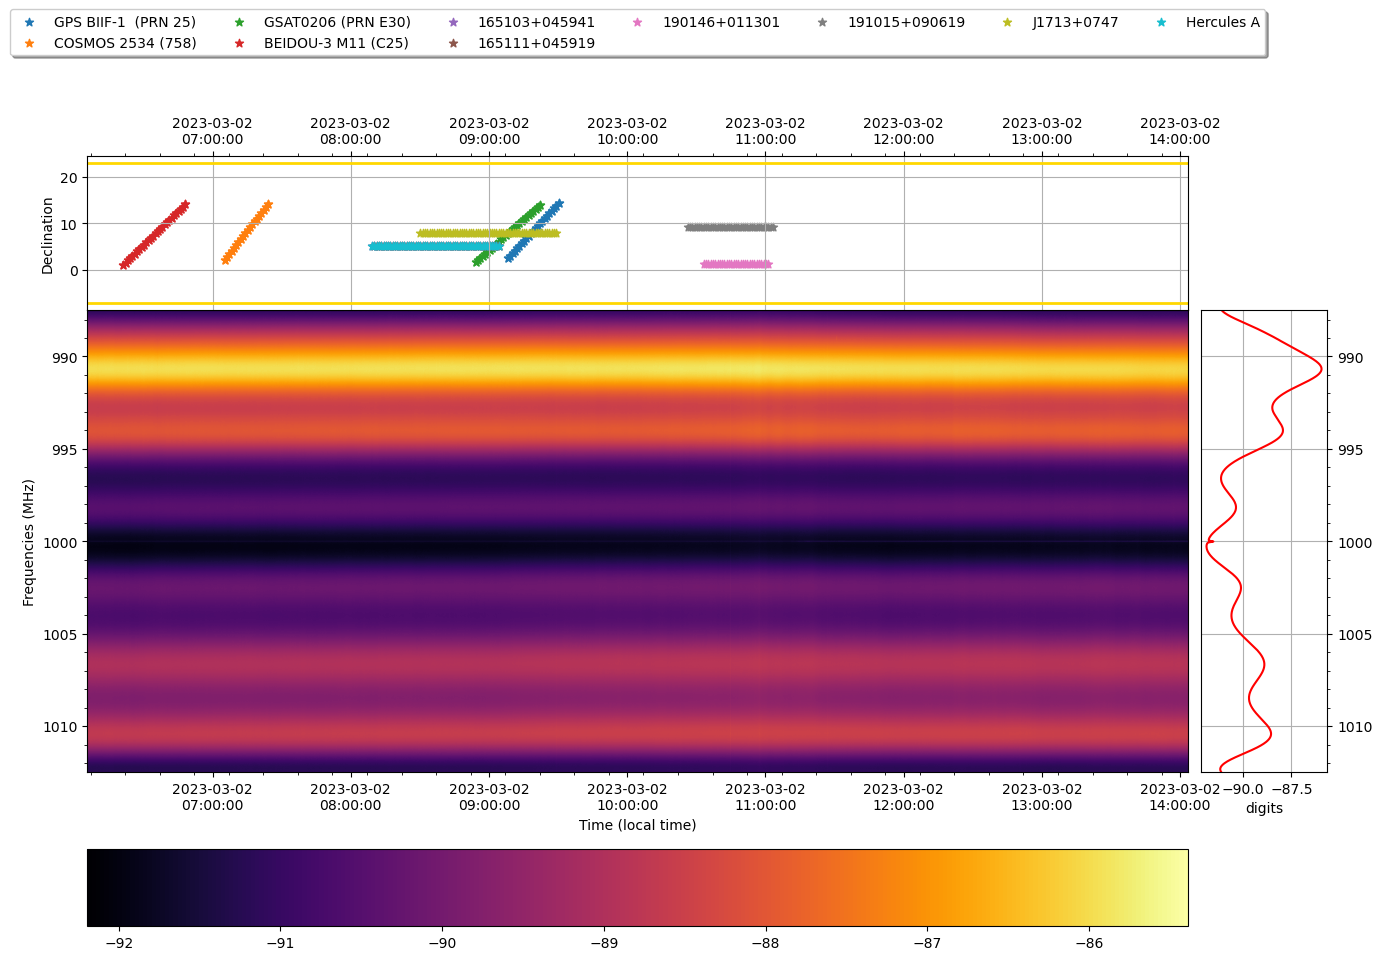

In [6]:
# Comparação do sinal recebido com objetos no céu.
obs.make_sky().sky.plot_timeseries(obs.data);

In [7]:
obs.data.shape

(70191, 1024)

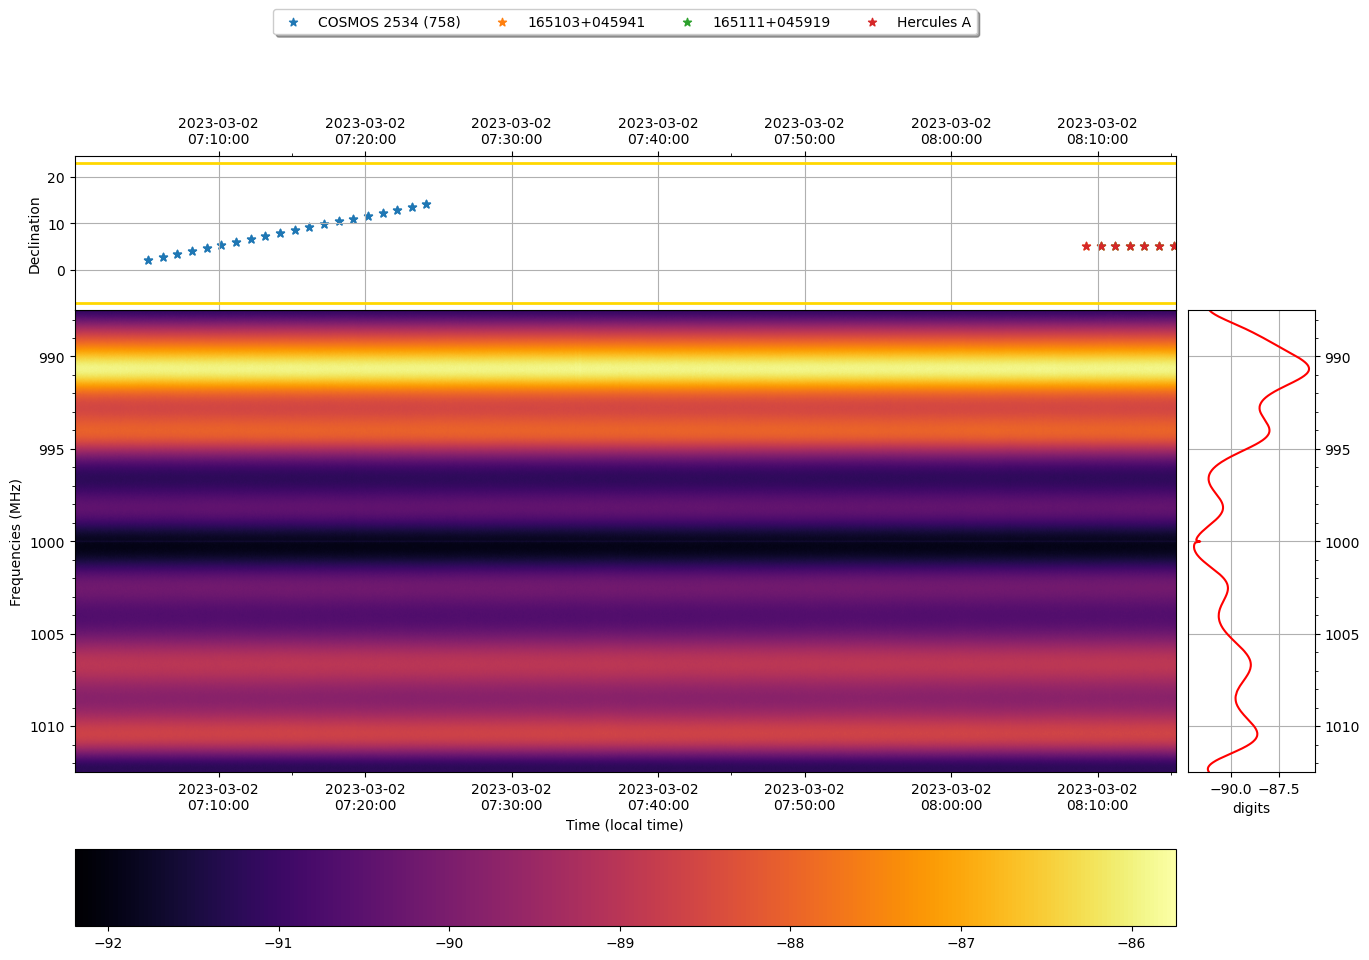

In [8]:
obs.make_sky().sky.plot_timeseries(obs.data.iloc[8000:20000, :]);

In [9]:
#obs.sky.plot_timeseries(obs.filter_data(obs.data, freqs=[1227, 1229]));
#obs.plot_waterfall(obs.data.rolling(window=1000).mean().dropna());

# Frequencia 1170 - 02/03/2023

In [10]:
fuso = RTLSDRGNU.instrument.timezone
begin = fuso.localize(pd.to_datetime("2023-03-02 18:00:00"))
obs = Obs(t_start=begin, duration=pd.Timedelta(6, unit="h")).initialize()
obs.backend = RTLSDRGNU
# Edite este nome com o prefixo que você usou no gnuradio.
RTLSDRGNU.name = "UIRAPURU_1170"
# Se necessário, altere esta variável para apontar para os seus dados.
obs.backend.controller.local_folder
# Carrega todas as observações feitas no período determinado com o prefixo indicado.
obs.backend.controller.local_folder = "../data/raw/GNURADIO/UIRAPURU/"

'../data/raw/GNURADIO/UIRAPURU/'

In [11]:
filenames = obs.backend._get_filenames(extension="fit", mode="59").filenames
filenames = filenames.loc[obs.t_start:obs.t_end]
MBsize = filenames.files.apply(lambda row: float(os.path.getsize(row) / 1024 ** 2)).sum()
print("Dados tem {:.2f} Mb".format(MBsize))

Dados tem 415.31 Mb


In [12]:
obs.load_observation(extension="fit")

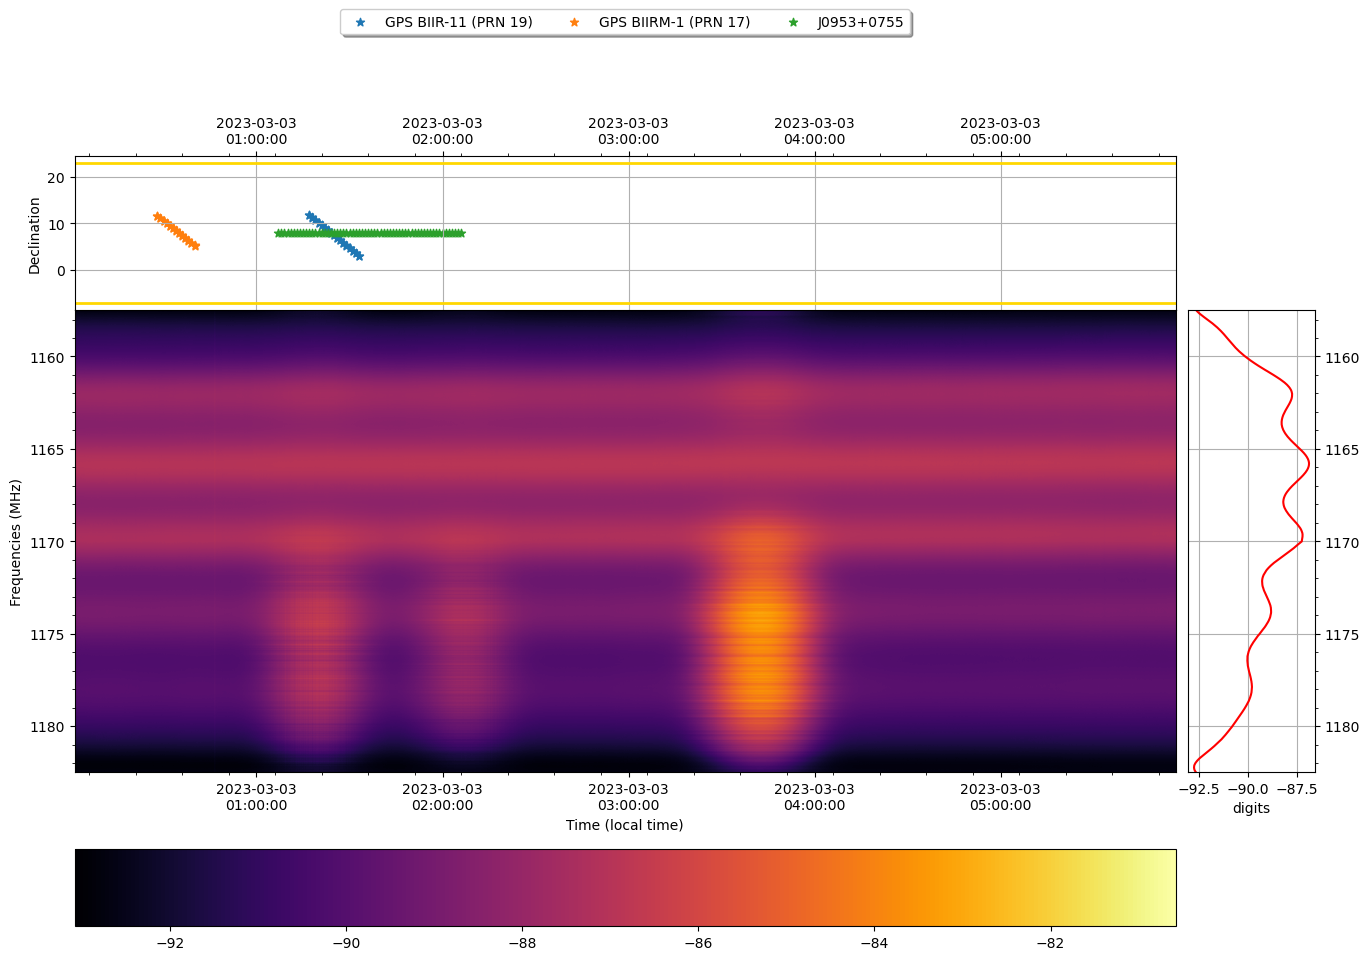

In [13]:
# Comparação do sinal recebido com objetos no céu.
obs.make_sky().sky.plot_timeseries(obs.data);

In [30]:
obs.data.shape

(35000, 1024)

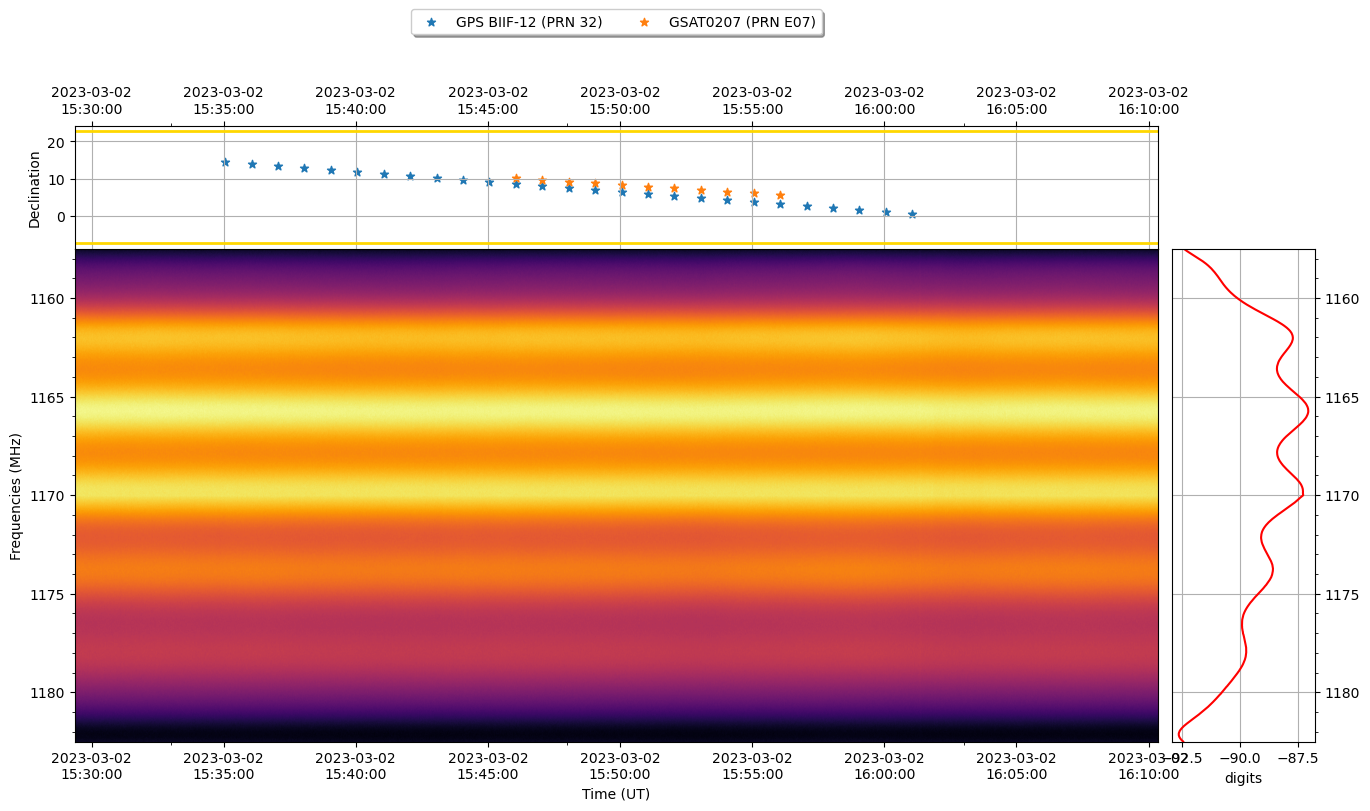

In [31]:
obs.sky.plot_timeseries(obs.data.iloc[12000:19000, :]);

In [ ]:
fuso = RTLSDRGNU.instrument.timezone
begin = fuso.localize(pd.to_datetime("2023-03-02 0:00:00"))
obs = Obs(t_start=begin, duration=pd.Timedelta(12, unit="h")).initialize()
obs.backend = RTLSDRGNU
# Edite este nome com o prefixo que você usou no gnuradio.
RTLSDRGNU.name = "UIRAPURU_1170"
# Se necessário, altere esta variável para apontar para os seus dados.
obs.backend.controller.local_folder
# Carrega todas as observações feitas no período determinado com o prefixo indicado.
obs.backend.controller.local_folder = "../data/raw/GNURADIO/UIRAPURU/"